In [1]:
!pip install minisom
!pip install simpsom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=ae164c79c4f7e93b24e4cc5f5f922e1803593ca7cb2a492ee3bf31b3dfe2c9b1
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from pylab import bone, pcolor, colorbar, plot, show
import simpsom as sps
from minisom import MiniSom

In [3]:
from google.colab import drive

drive.mount('/content/drive')
!pip install -q kaggle
!pip install -q kaggle-cli
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/kaggle.json" ~/.kaggle/
!cat ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ujjwal9/credit-card-applications

Mounted at /content/drive
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 66.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 kB 14.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for lxml
ERROR: Could not build wheels for lxml, which is required to install pyproject.toml-based pr

In [4]:
!unzip credit-card-applications.zip

Archive:  credit-card-applications.zip
  inflating: Credit_Card_Applications.csv  


In [5]:
import pandas as pd
data =  pd.read_csv("/content/Credit_Card_Applications.csv")

In [6]:
df = pd.DataFrame(data)
y = df['Class']
df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [8]:
#check for NaN values
df.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

In [9]:
#check for NaN values
df.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

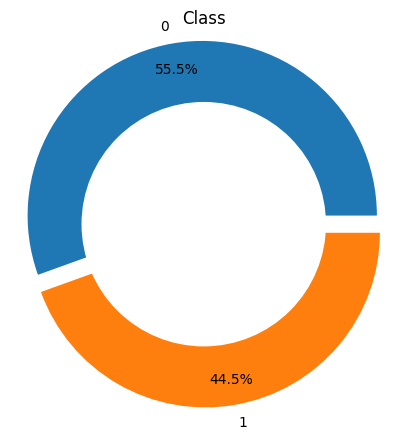

In [10]:
# Create a figure and axes with a specified size of 5x5 inches
fig1, ax1 = plt.subplots(figsize=(5,5))

# Get the unique values and their counts from the 'Class' column in the DataFrame df
index = df['Class'].value_counts().index
size = df['Class'].value_counts().values

# Define the explosion for each slice in the pie chart
explode = (0.05, 0.05)

# Create a pie chart with the specified size, labels, percentage format, explosion, and other settings
plt.pie(size, labels=index,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# Create an inner circle to make the pie chart look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set the aspect ratio of the axes to be equal to make the pie chart circular
ax1.axis('equal')

# Set the title of the plot
plt.title("Class")

# Display the plot
plt.show()

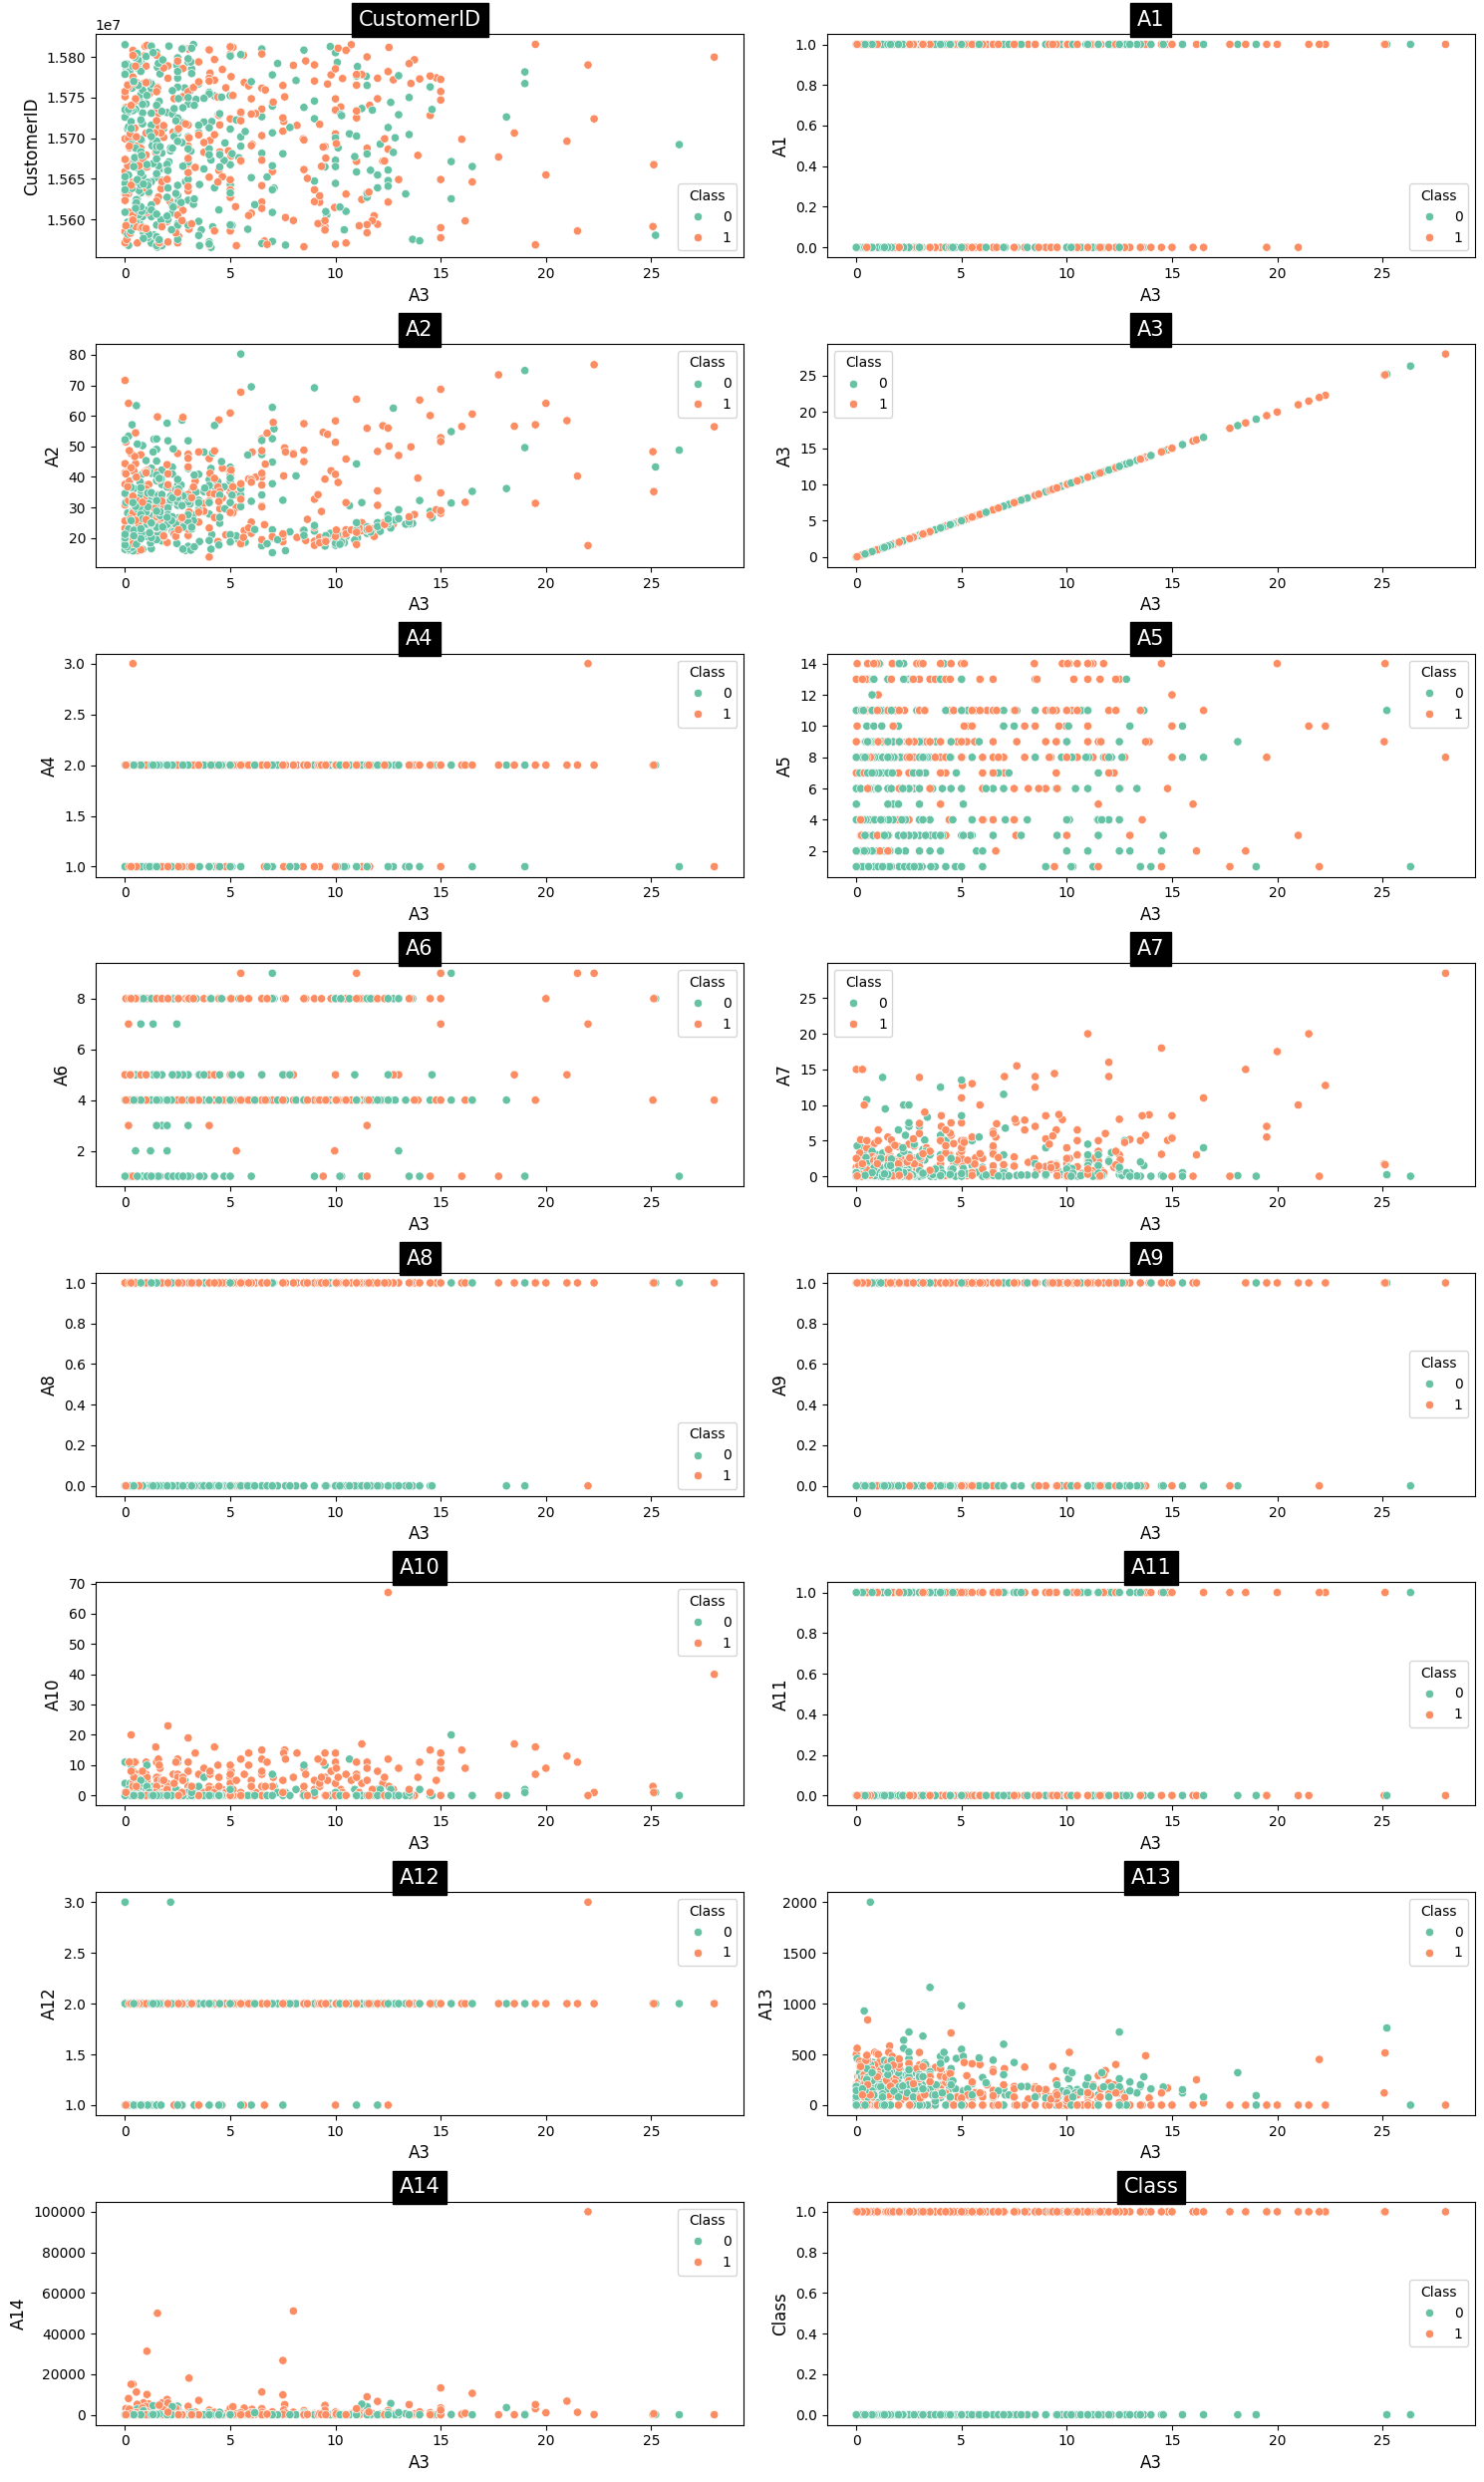

In [11]:
sns.set_palette("Set2")
plt.figure(figsize = (15,25))
for idx, i in enumerate(df):
    plt.subplot(8, 2, idx + 1)
    sns.scatterplot(x =df['A3'], y=df[i], hue=df['Class'] , data = df)
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel('A3' , size = 12)
    plt.ylabel(i , size = 12)
plt.tight_layout()
plt.show()

In [12]:
# Remove the column "Class" from the DataFrame df along the columns axis (axis=1)
# and modify df in place
df.drop("Class", axis=1, inplace=True)

In [13]:
# Create a MinMaxScaler object with a feature range of (0,1)
scaler = MinMaxScaler(feature_range=(0,1))

# Fit the scaler to the data in the DataFrame df and transform df
# Store the scaled data in a new DataFrame df1
df1 = scaler.fit_transform(df)

# Display the scaled data
df1

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [14]:
#We build a 30x30 network and initialise its weights with PCA
#net = sps.SOMNet(30, 30, df1, PBC=True)
net = sps.SOMNet(30, 30, df1,
                init='PCA', metric='cosine', PBC=True,
                random_seed=32, GPU=False)

#Now we can train it with 0.1 learning rate for 1000 epochs
#net.train(0.1, 1000)
net.train(train_algo='batch', start_learning_rate=0.1, epochs=1000,
    batch_size=-1)

Periodic Boundary Conditions active.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!


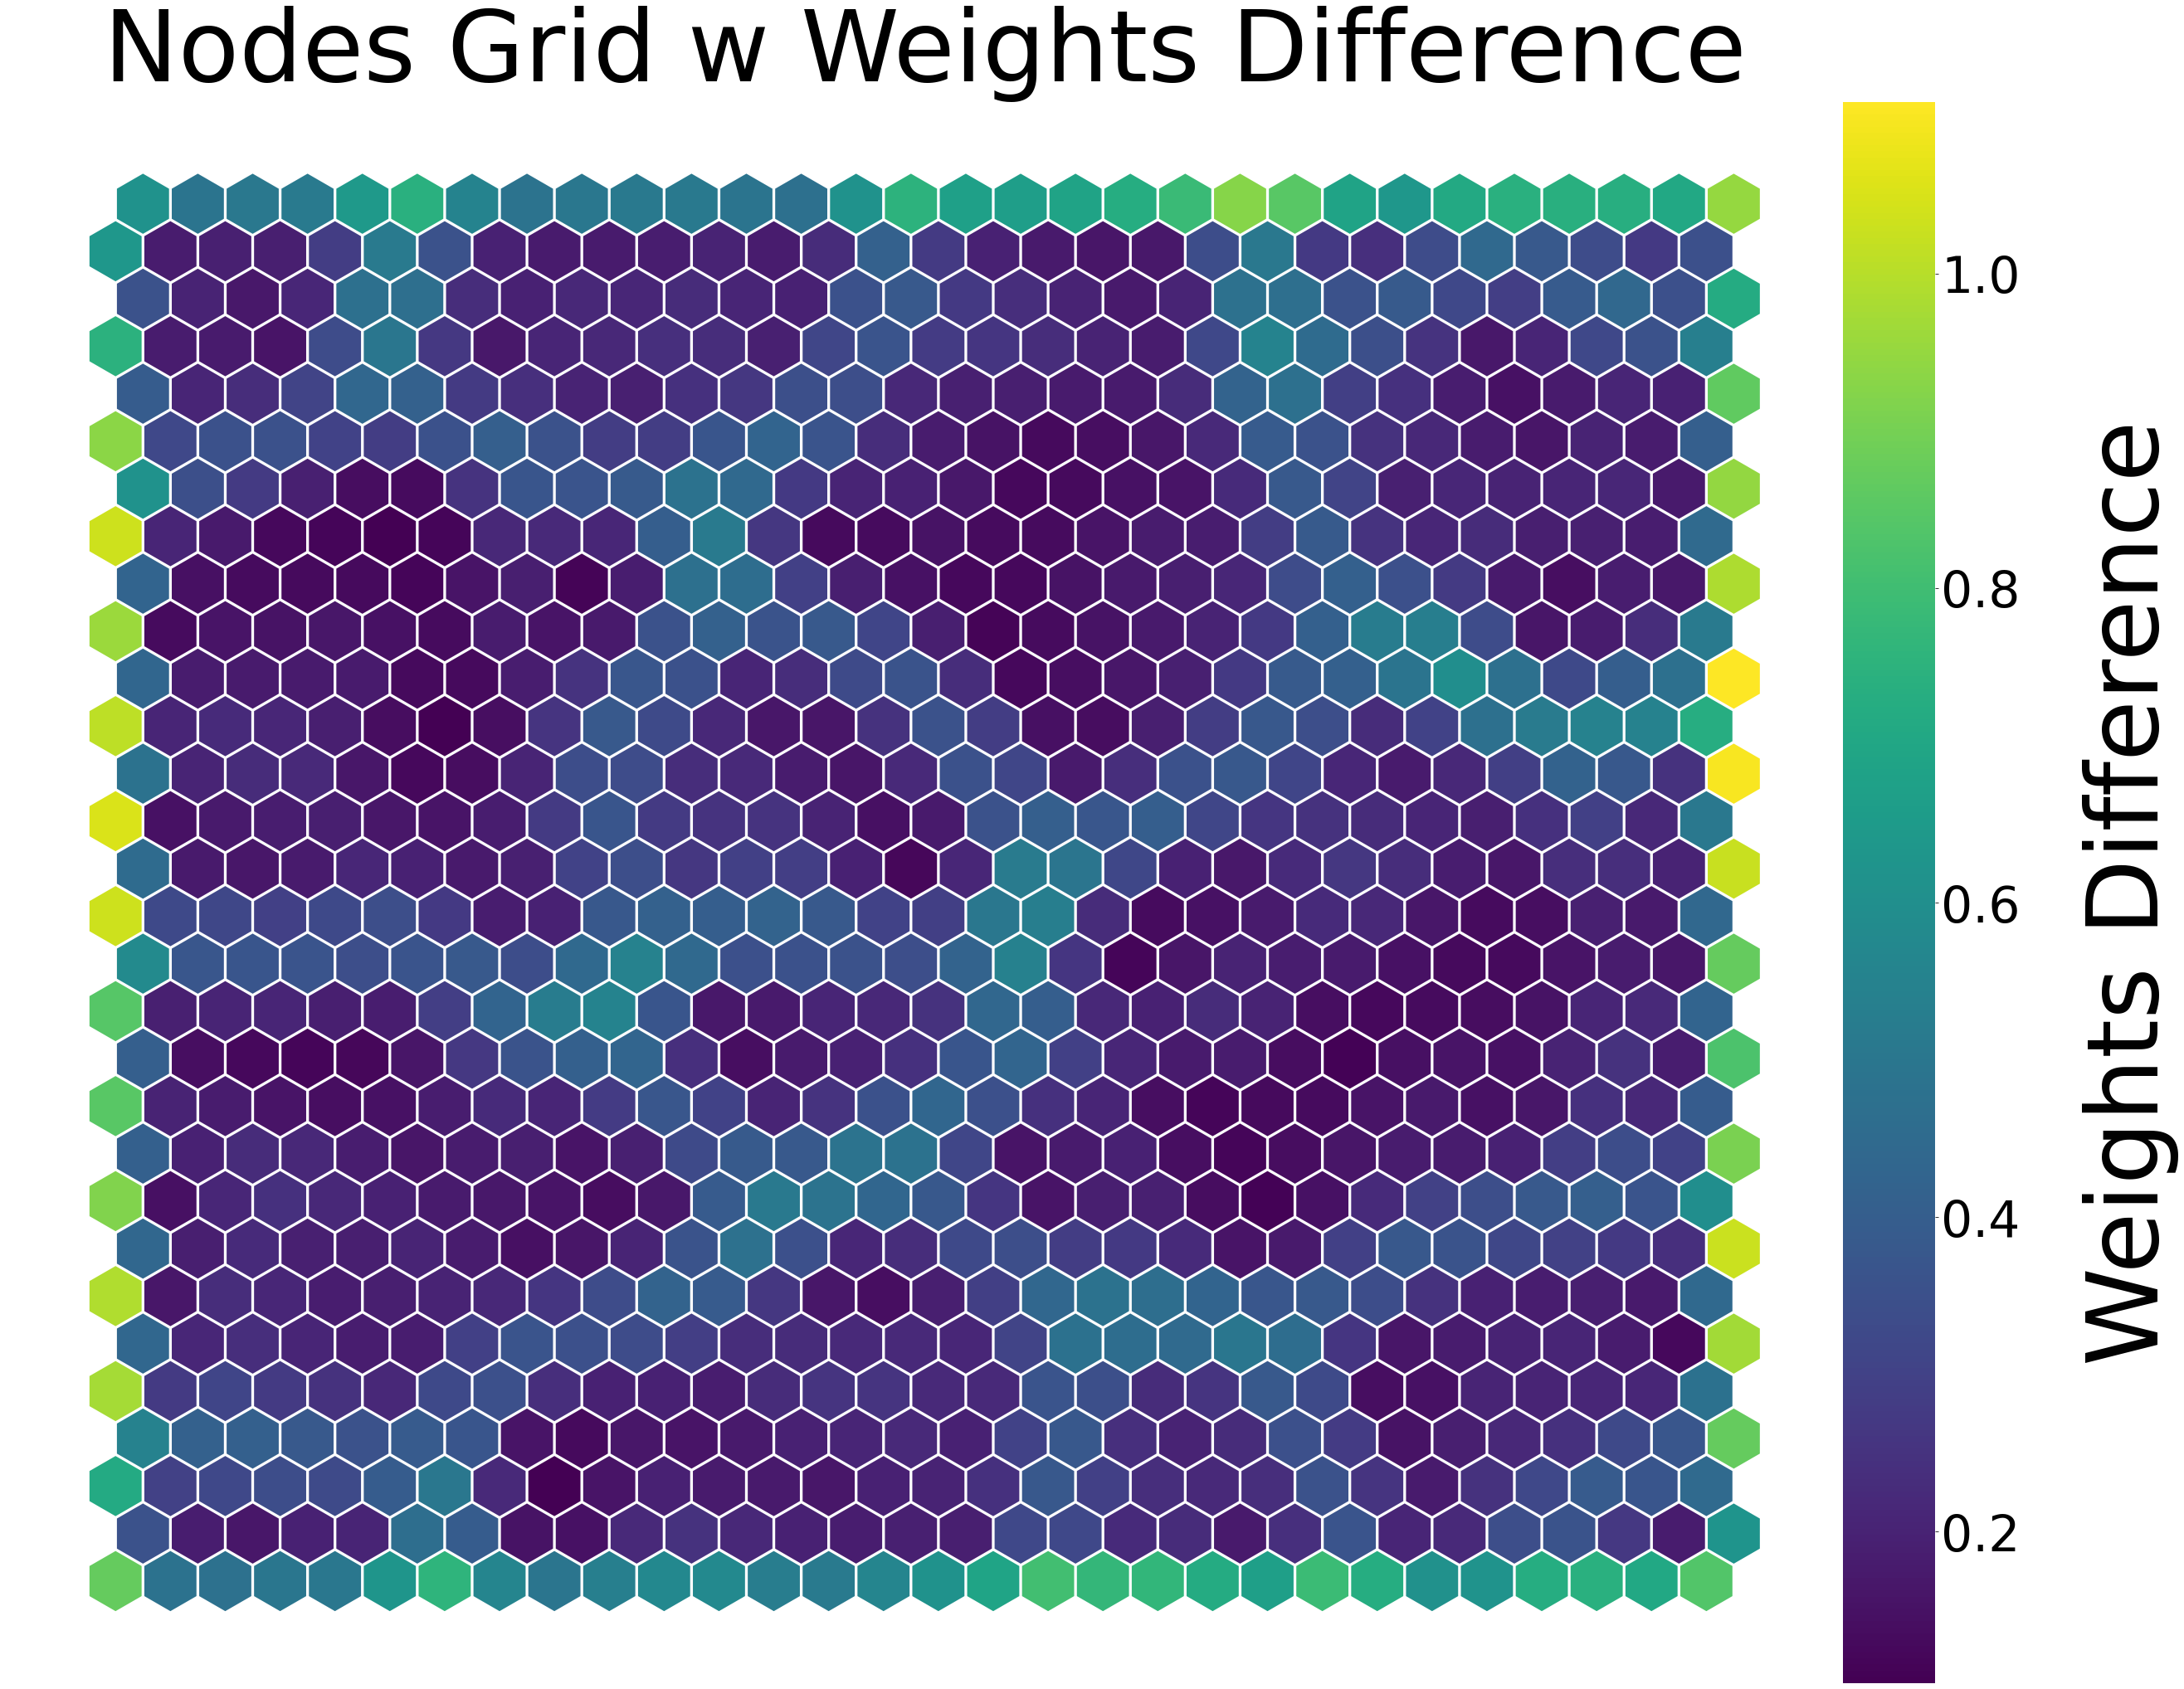

<Figure size 640x480 with 0 Axes>

In [15]:
#We print to screen the map of the weights differences between nodes, this will help us identify cluster centers

net.diff_graph(show=True)

In [16]:
# Training the SOM

Som = MiniSom(x = 15, y = 15, input_len = 15, sigma = 1.0, learning_rate = 0.5)
Som.random_weights_init(df1)
Som.train_random(data = df1, num_iteration = 1000)

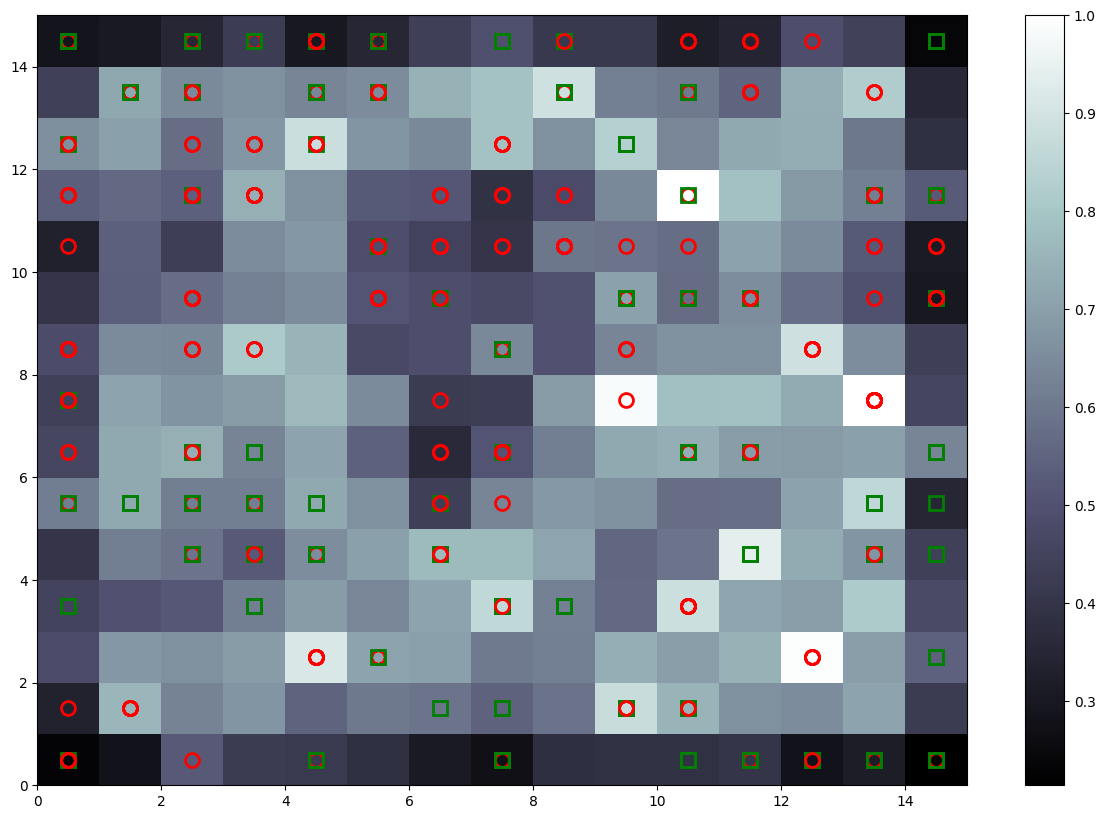

In [17]:
# Visualizing the results

plt.figure(figsize = (15,10))
bone()
pcolor(Som.distance_map().T)
colorbar()
# check if customers got approval or not, green - yes, red - no
markers = ['o','s'] # o/circle for red - no approval, s/square for green - approval
colors = ['r','g']
for i,x in enumerate(df1): # i becomes index, and x is a vector containing other attributes
    w = Som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None'
        , markersize = 10, markeredgewidth = 2)

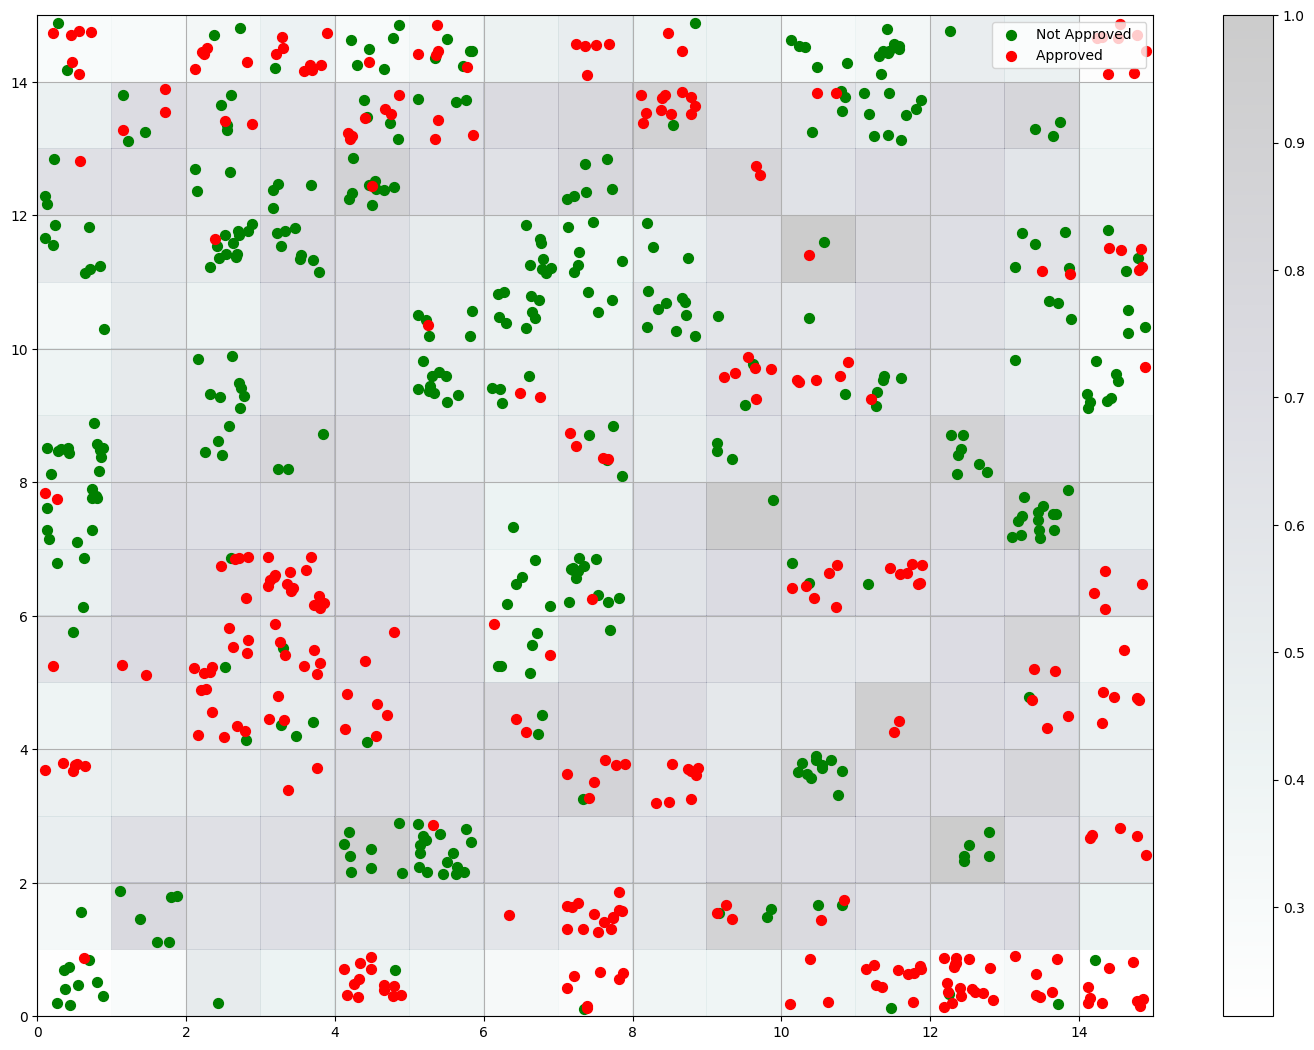

In [18]:
# Find the winning neuron (or node) for each data point in df1
w_x, w_y = zip(*[Som.winner(d) for d in df1])

# Convert the winning neuron coordinates to NumPy arrays
w_x = np.array(w_x)
w_y = np.array(w_y)

# Define label names for the plot
label_names = {0:'Not Approved  ', 1:'Approved '}

# Create a figure with a specified size
plt.figure(figsize=(18, 13))

# Create a pseudo color plot of the distance map of the SOM
plt.pcolor(Som.distance_map().T, cmap='bone_r', alpha=.2)

# Add a color bar to the plot
plt.colorbar()

# Iterate over unique values in y (assuming y is the target variable)
for c in np.unique(y):
    # Select data points where y is equal to the current unique value
    idx_target = y==c

    # Scatter plot the winning neuron coordinates with a slight jitter for better visibility
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=colors[c-1], label=label_names[c])

# Add a legend to the plot
plt.legend(loc='upper right')

# Add grid lines to the plot
plt.grid()

# Display the plot
plt.show()